In [ ]:
import numpy as np
import plotly.graph_objects as go

# Seminar LinAlg

Прежде чем мы начнем выполнять задачи линейной алгебры, вспомним снова про вектора. Их очень полезно визуализировать, для чего ниже написана соответствующая функция. Почитайте ее описание (Docstring).

In [ ]:
# @title Function `plot_vectors(vectors: np.ndarray, colors=None, labels=None)`
def plot_vectors(vectors: np.ndarray, colors:list=None, labels:list=None)->None:
    """
    Plots 3D vectors using Plotly.

    This function visualizes 3D vectors in a 3D space by plotting them as lines with arrows
    at their endpoints. Each vector can have a different color and an optional label for
    identification.

    Parameters:
    -----------
    vectors : np.ndarray
        A 2D numpy array of shape (n, 2) or (n, 3) representing the vectors to be plotted.
        Each row corresponds to a vector, where the first two columns represent the x and y
        coordinates, and the third column (if present) represents the z coordinate.

    colors : list of str, optional
        A list of color specifications for each vector. The default is red for all vectors
        if no colors are provided.

    labels : list of str, optional
        A list of labels for each vector. These labels will be displayed next to the corresponding
        vector in the plot. If no labels are provided, no text will be shown.

    Returns:
    --------
    None
        Displays a 3D plot of the vectors using Plotly.
    """
    fig = go.Figure()
    origin = [0, 0, 0]

    if vectors.shape[1] == 2:
        vectors = np.concatenate([vectors, np.zeros((vectors.shape[0], 1))], axis=1)

    vectors = vectors.tolist()

    if colors is None:
        colors = ['red'] * len(vectors)

    for i, vector in enumerate(vectors):
        color = colors[i]
        fig.add_trace(go.Scatter3d(x=[origin[0], vector[0]],
                                     y=[origin[1], vector[1]],
                                     z=[origin[2], vector[2]],
                                     mode='lines',
                                     line=dict(color=color, width=5)))

        fig.add_trace(go.Cone(x=[vector[0]], y=[vector[1]], z=[vector[2]],
                              u=[vector[0]], v=[vector[1]], w=[vector[2]],
                              showscale=False,
                              colorscale=[[0, color], [1, color]],
                              sizemode="absolute",
                              sizeref=0.5))


        if labels is not None and i < len(labels):
            fig.add_trace(go.Scatter3d(
                x=[vector[0]], y=[vector[1]], z=[vector[2]],
                mode='text',
                text=[labels[i]],
                textposition='top center',
                showlegend=False
            ))

    title = '3D Векторы'
    fig.update_layout(title=title, scene=dict(xaxis_title='X Axis',
                                               yaxis_title='Y Axis',
                                               zaxis_title='Z Axis'))
    fig.show()

In [ ]:
plot_vectors # обращение к функции "без вызова" выводит ее описание!

<function __main__.plot_vectors(vectors: numpy.ndarray, colors: list = None, labels: list = None) -> None>

Ниже пример использования данной функции, где каждому вектору из массива можно поставить в соответствие цвет и лэйбл.

In [ ]:
vectors = np.array([[1, 2, 3],
                    [3, 1, 4],
                    [2, 3, -1]])
colors = ['red', 'blue', 'green']
labels = ['Vector 1', 'Vector 2', 'Vector 3']

plot_vectors(vectors, colors=colors, labels=labels)

# Сумма матриц и умножение на число.

# Task_1

Даны две матрицы. Расчитайте значения следующих выражений:



*   $a + b$
*   $2b -a$

*   $0.1(3a+2b - 10)$
*   $3a - 2a^T - 5b +1$





In [ ]:
a = np.array([[2, 4, 5], [4, 7, 1], [0, 3, 5]])
b = np.array([[-2, 3, -4], [9, 1, 1], [7, -7, 0]])

In [ ]:
a, b

(array([[2, 4, 5],
        [4, 7, 1],
        [0, 3, 5]]),
 array([[-2,  3, -4],
        [ 9,  1,  1],
        [ 7, -7,  0]]))

# Матричное произведение. Dot Product. (Скалярное произведение)

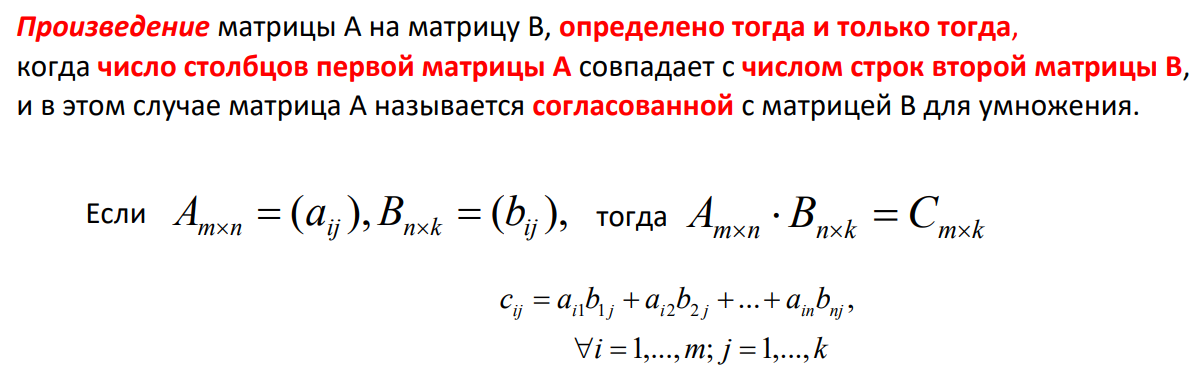

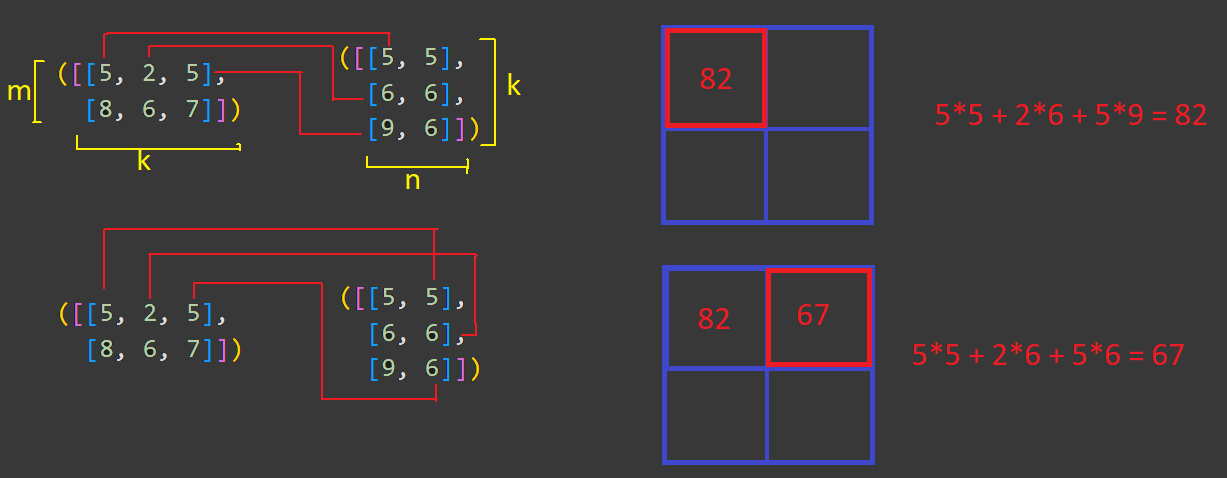

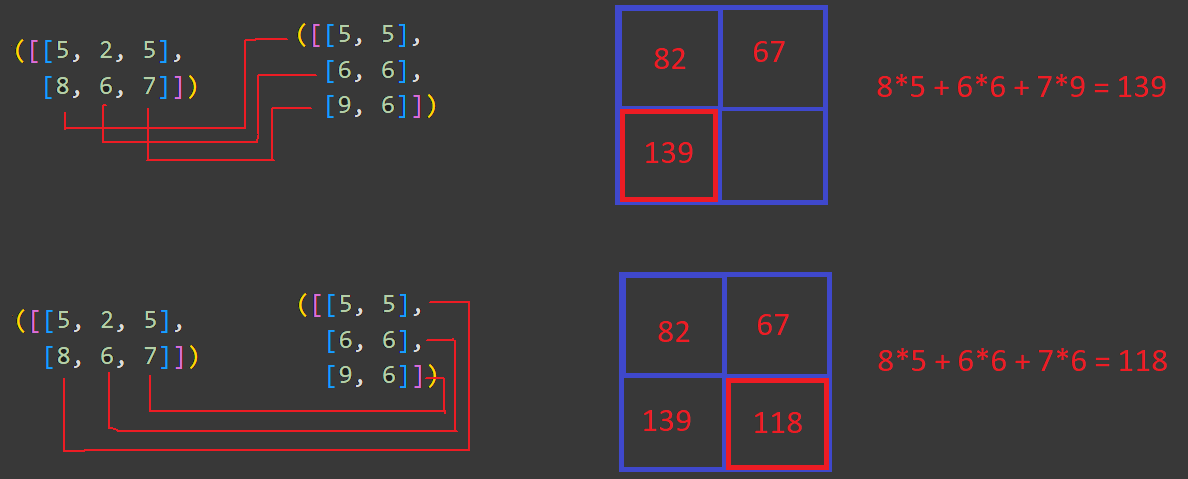

In [ ]:
a = np.array([[5, 2, 5],
              [8, 6, 7]])

b = np.array([[5, 5],
              [6, 6],
              [9, 6]])

Но важно помнить, что $A*B \neq B*A$

In [ ]:
np.dot(b, a)

array([[65, 40, 60],
       [78, 48, 72],
       [93, 54, 87]])

Почему изменилась размерность матрицы?

# Task_2

Выполните матричное произведение.

In [ ]:
a = np.array([1, 2, 3])
b = np.array([3, 2, 1])

In [ ]:
c = np.array([[9, 6], [1, 2]])
d = np.array([[5, 9], [8, 9]])
# c*d


In [ ]:
e = np.array([[8, 8, 9], [3, 8, 8]])
f = np.array([[3, 8, 1], [4, 3, 6]])
# Выполните произведение e*f чтобы размерность полученной матрицы была 2х2

# Task_3

Найдите взвешенную сумму, если дан вектор-объект и веса.


In [ ]:
object_ = [1000, 300, 1500, 123000, -2, 1, 0]
weihhts = [2, -1, 3, .07, .1, 1, 10]

# Task_4

Найдите средне взвешенную сумму для каждой строки.

In [ ]:
objects = np.random.randint(1, 1000, (10, 5))
weights = np.random.randn(5)

# Определитель матрицы

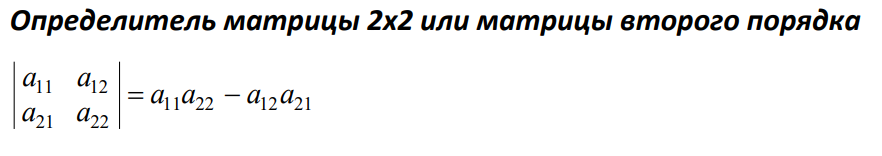



```
a = np.array([[1, 2], [3, 4]])

det_a = np.linalg.det(a)
```



# Task_5

Расчитайте определитель матрицы второго порядка "руками" и с помощью встроенной функции.

In [ ]:
a = np.array([[2, 4], [3, 1]])

# Game.

Поиграем в игру. Перед Вами `Gradio` приложение, где вы интерактивно заполняете числовую таблицу-матрицу и получаете Определитель этой матрицы. Сперва вам предлагается заполнить таблицу 2х2.

Игра предполагает два участника (команды).

## Игра 1.

По очереди участники (команды) заполняют любую пустую ячейку любым числом. Так каждая из команд сделает 2 хода. После этого вычисляется Определитель матрицы.
* Если определитель ПОЛОЖИТЕЛЕН, выигрывает первый участник (команда)
* Если определитель ОТРИЦАТЕЛЕН, выигрывает второй участник (команда)

Вам необходимо разработать выигрышную стратегию, основанную на понимании смысла определителя матрицы.

## Игра 2

Условия такие же точно, но
* Таблицу необходимо сделать 3х3
* Допустимые числа от 1 до 9 без повторов.

In [1]:
!pip install gradio
import gradio as gr

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached starlette-0.41.3-py3-none-any.whl.metadata (6.0 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/57.2 MB ? eta -:--:--
   - -------------------------------------- 2.1/57.2 MB 13.0 MB/s eta 0:00:05
   ------ --------------------------------- 9.2/57.2 MB 25.9 MB/s eta 0:00:02
   ------------ --------------------------- 18.4/57.2 MB 33.1 MB/s eta 0:00:02
   ------------------- -------------------- 28.3/57.2 MB 35.9 MB/s eta 0:00:01
   ------------------------- -------------- 35.9/57.2 MB 36.2 MB

d:\AI_academy\ai\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# @title Game
initial_data = np.full((2, 2), None)

def update_table(data):
    matrix = np.array(data, dtype=float)
    determinant = np.linalg.det(matrix)
    return f"{determinant:.2f}"

# Интерфейс Gradio
app = gr.Interface(
    fn=update_table,
    inputs=gr.Dataframe(
        value=initial_data,
        type="numpy",
        row_count=2,
        col_count=2,
        interactive=True,
        show_label=False,
        headers=['Header 1', 'Header 2'],
    ),
    outputs=gr.Textbox(label="Определитель матрицы"),
    title="Каким будет определитель?",
    description="Введите числа в ячейки таблицы напрямую и получите определитель матрицы."
)

# Запуск приложения
app.launch()


NameError: name 'np' is not defined

# Минор элемента матрицы

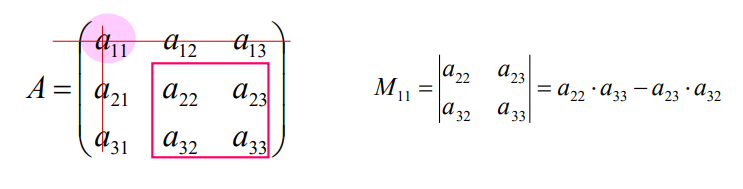

# Task_6

Напишите функцию, которая получает на вход матрицу и индексы ее элемента, для которого она вернет минор этого элемента.

Вам могут быть полезны следующие функции:



```
# Удаляем вторую строку и третий столбец
arr = np.delete(arr, 1, axis=0)  # axis=0 - это ось строк
arr = np.delete(arr, 2, axis=1)  # axis=1 - это ось столбцов
```



In [ ]:
arr = np.array([[3, 5, 5],
                [9, 7, 8],
                [9, 1, 1]])

In [ ]:
def get_minor(arr: np.ndarray, i: int, j: int)-> float:
  pass # your code

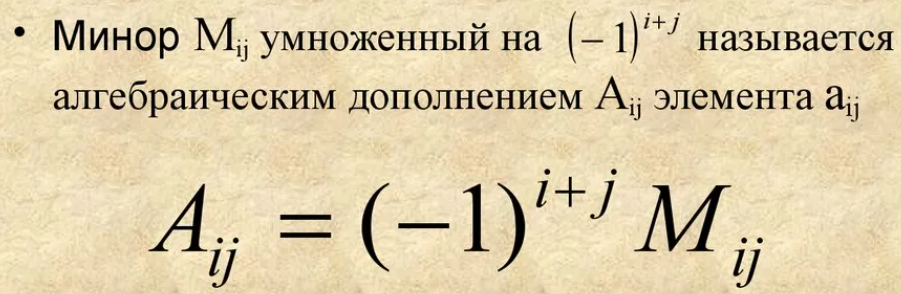

# Task_7

Дополните функцию из предыдущего задания чтобы она возвращала Алгебраическое Дополнение для указанного элемента.

In [ ]:
arr = np.array([[3, 5, 5],
                [9, 7, 8],
                [9, 1, 1]])

In [ ]:
def get_alg_compl(arr: np.ndarray, i: int, j: int)-> float:
  pass # your code

# Task_8

Напишите функцию, которая получает на вход матрицу и возвращает соразмерную матрицу, состоящую из алгебраических дополнений для всех элементов исходной матрицы.

In [ ]:
arr = np.array([[3, 5, 5],
                [9, 7, 8],
                [9, 1, 1]])

In [ ]:
def alg_compl_matr(arr: np.ndarray)-> np.ndarray:
  pass # your code

# Task_9

Даны два вектора.
* Рассчитайте их векторное произведение. (не скалярное)
* Рассчитайте площадь треугольника, построенного на данных двух векторах.
* Вычислите угол между нормалью к плоскости, в которой лежат данные вектора и осью OZ в градусах.

In [ ]:
a = np.array([2, -1, 4])
b = np.array([-3, 4, -1])

# Task_9_A*

Радиус-вектор - это вектор, который соединяет начало отсчета с точкой, помещенной в пространстве, заданном данной системой координат. Таким образом, координаты радиус-вектора соответствуют местоположению точки. Если точка переместилась в пространстве, то радиус вектор поворачивается относительно всех осей координат в некоторой произвольной плоскости.
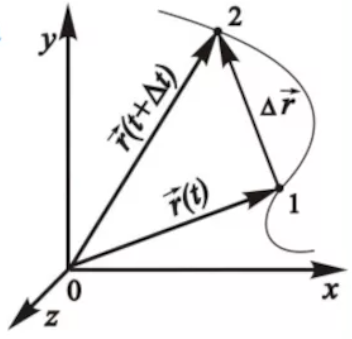

Даны координаты начального и конечного положения точки.
* Найдите все углы к осям координат оси поворота радиус вектора при перемещении материальной точки. Можете повизуализировать процесс.
* Найдите модуль $\Delta\overrightarrow{r}$. Это вектор можно выразить из выражения:

$$\overrightarrow{r_0} + \Delta\overrightarrow{r} = \overrightarrow{r_1}$$

In [ ]:
start = [1, -3, 2]
stop = [-2, 1, 3]

# Task_10

Для поворота вектора на заданный угол относительно выбранной оси можно использовать матрицу поворота:


Относительно оси OX:

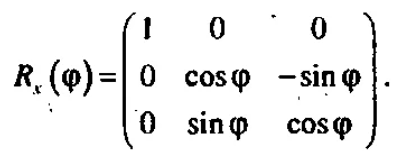

Относительно оси OY:

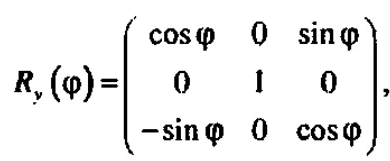

Относительно оси OZ:

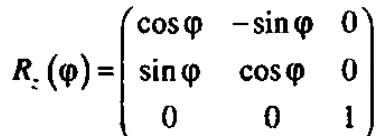

Для поворота вектора необходимо выполнить следующую операцию:

$$\overrightarrow{a`} = R\overrightarrow{a} $$

Дан вектор. Поверните его
* на 30 градусов по оси OX
* на 20 градусов по оси OY

Получите координаты нового вектора.

In [ ]:
a = [2, -5, 4]

# Task_11

Для данной матрицы `a` рассчитайте обратную руками (без использования специальной функции). Определитель можно расчитать с помощью `det()`. Результат выведите через print()

$$A^{-1} = \frac{1}{|A|} * S^T$$

Где $|A|$ - определитель матрицы не равный нулю,

$S$ - Матрица, состоящая из алгебраических дополнений для каждого элемента матрицы А.

In [ ]:
a = np.array([[3, 1, -3], [4, 3, 7], [-1, 2, 6]])

# Обратная матрица

Если матрица $A$ обратима, то существует такая матрица $A^{-1}$, для которой выполняется следующее равенство:

$A*A^{-1} = E\;\;\;$, где $E$ - единичная матрица.

In [ ]:
arr = np.array([[3, 5, 5],
                [9, 7, 8],
                [9, 1, 1]])
arr_inv = np.linalg.inv(arr)
arr_inv

array([[-0.02380952,  0.        ,  0.11904762],
       [ 1.5       , -1.        ,  0.5       ],
       [-1.28571429,  1.        , -0.57142857]])

In [ ]:
np.dot(arr, arr_inv).round(10)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

# Task_12

Решите матричное уравнение

$2AX - B = C$

In [ ]:
A = np.array([[-1,  7, -1],
              [ 8,  2, -3],
              [ 1,  5,  9]])
B = np.array([[ 5,  2, -2],
              [-2,  9, -5],
              [ 7, -4,  2]])
C = np.array([[ 35,  48,  62],
              [ -8,  -5,  23],
              [161, 202, 226]])

# Task_13

Решите матричное уравнение

$SXQ = B$

In [ ]:
S = np.array([[ 7, -4,  8, -3,  8],
              [-3, -4, -3, -5, -1],
              [-4, -5,  8, -4,  9],
              [ 2,  0, -4, -3,  2],
              [ 7,  1, -2,  3,  9]])
Q = np.array([[ 8,  7,  9,  4,  2],
              [ 7,  1,  1,  4, -4],
              [ 4,  2,  6,  5,  5],
              [ 8, -4,  4,  3,  3],
              [-3,  1,  4, -4, -3]])
B = np.array([[ 5016,  1289,  5240,  2404,   621],
              [-4296, -1079, -4520, -2044,  -531],
              [ 4404,  1241,  4460,  2176,   549],
              [-1233,  -327, -1275,  -597,  -153],
              [ 5958,  1542,  6210,  2862,   738]])

# Task_14
Найдите результирующий вектор $\omega$ согласно данному выражению.

$\omega = (X^TX)^{-1}X^Ty$

Прежде, чем вы получите результат, попробуйте выяснить, какую размерность мы ожидаем у полученного вектора?

In [ ]:
X = np.random.randn(10, 7)
X

array([[-2.78684558,  2.07248892, -0.12065152, -0.1940934 ,  1.08100145,
         1.48212727,  1.33269566],
       [ 0.63997046, -0.95364085,  0.55837273,  0.7954411 ,  0.49056462,
         0.10907057,  0.10785984],
       [-1.02917124,  0.39529626, -1.19991695, -0.94494183,  0.33881066,
        -0.16954415, -0.1852372 ],
       [-0.34454899,  1.27035701,  1.00611843, -0.5442301 , -1.23965568,
         0.81254166, -0.13002401],
       [ 0.36495002,  1.08978913,  0.12018989,  0.40259685, -0.0784384 ,
        -0.68773568,  0.83401761],
       [ 1.03161119, -0.85420566, -0.16100004, -0.19756699,  0.2498119 ,
         0.68591758,  0.85732827],
       [-0.44828591,  1.47681964, -0.08911163, -2.47606855, -1.13382767,
        -0.6047325 ,  1.43141248],
       [ 1.20151658,  0.59879521,  0.37918596, -0.8412752 ,  0.76124299,
         0.30778869, -0.63807042],
       [ 2.05181895,  0.80521513, -0.04153165,  1.41431691, -0.92157349,
         0.13865151,  0.06254246],
       [ 1.65911669, -2.6235

In [ ]:
y = np.random.randn(10)
y

array([-0.02931538, -0.60563371,  0.11197294, -0.39796603,  0.36716933,
       -1.57229329,  0.16593082,  0.00690545,  0.32125697,  1.10347725])

# Системы линейных уравнений.

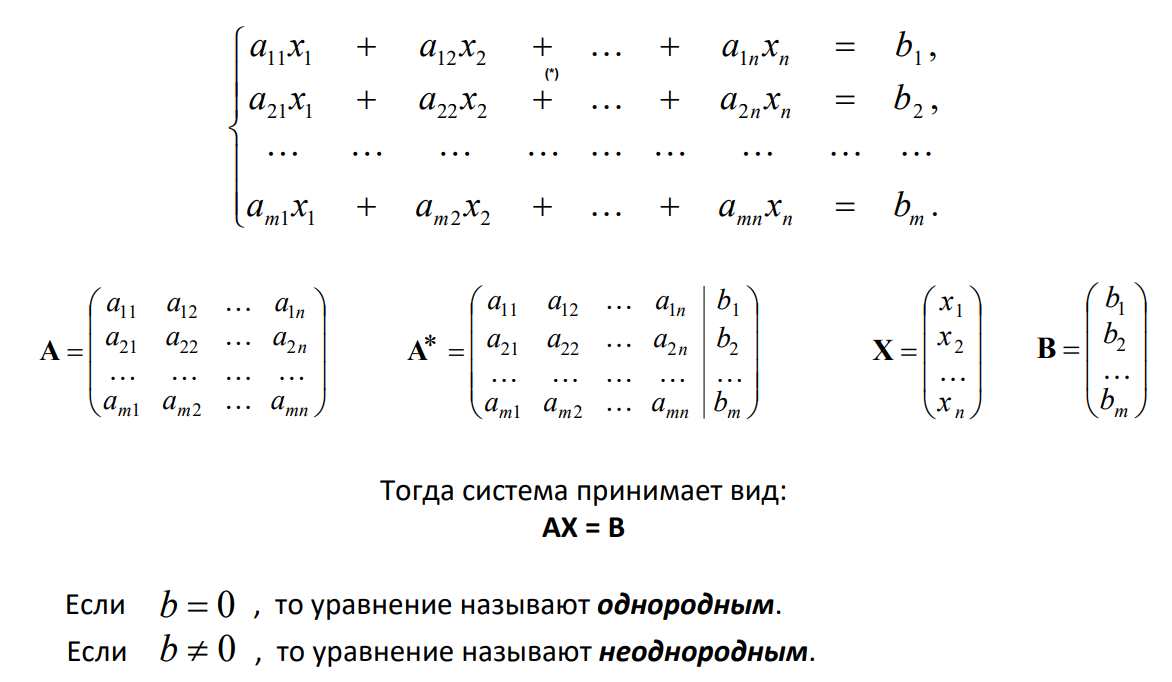

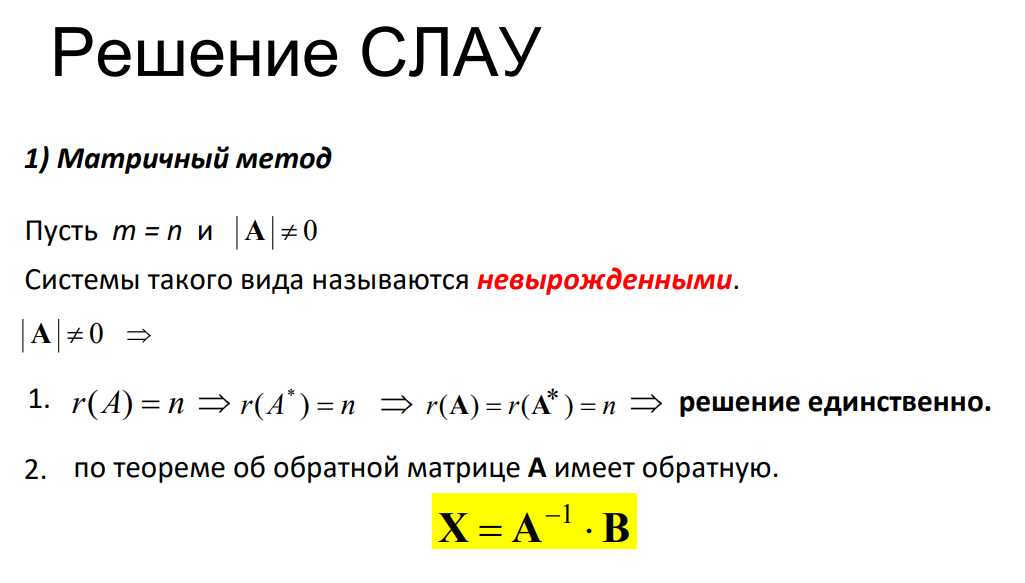

# Task_15

Решите систему линейных уравнений способом обратной матрицы и методом Крамера!

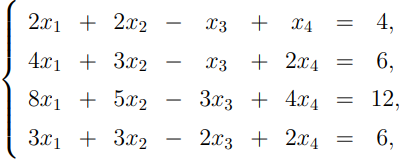

# Task_16

Решите систему линейных уравнений

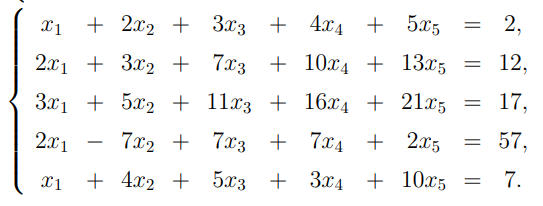

# Task_17

Вектор $\overrightarrow{V}$ является линейной комбинацией векторов $\overrightarrow{V_1}$, $\overrightarrow{V_2}$ и $\overrightarrow{V_3}$.

Это значит, что все вектора составляют уравнение вида:

$$\lambda_1\overrightarrow{V_1} + \lambda_2\overrightarrow{V_2} + \lambda_3\overrightarrow{V_3} = \overrightarrow{V}$$

Где $\lambda_1$, $\lambda_2$ и $\lambda_3$ - некоторые коэффициенты (скаляры).

Вычислите значения данных коэффициентов, если нам даны все вектора. Задача сводится к решению системы линейных уравнений.

In [ ]:
v = [3, 6, 10]
v_1 = [1, 1, 1]
v_2 = [1, 4, 3]
v_3 = [1, 3, 5]

v, v_1, v_2, v_3 = np.array(v), np.array(v_1), np.array(v_2), np.array(v_3)

# Task_18



In [ ]:
import pandas as pd
brand = ['Toyota', 'Kia', 'Kia', 'Kia', 'Toyota']
mileage = [120000, 20000, 200000, 250000, 10000]
transmission = [1, 1, 0, 0, 0] # 1- auto, 0 - manual
pr_year = [2015, 2022, 2010, 2008, 2023]
type_ = [1, 0, 0, 1, 1] # 1- седан, 0 - внедорожник
price = [10000, 15000, 9000, 7000, 20000]
df = pd.DataFrame({'brand': brand,
                   'mileage': mileage,
                   'transmission': transmission,
                   'pr_year': pr_year,
                   'type_': type_,
                   'price': price})
df

,brand,mileage,transmission,pr_year,type_,price
0,Toyota,120000,1,2015,1,10000
1,Kia,20000,1,2022,0,15000
2,Kia,200000,0,2010,0,9000
3,Kia,250000,0,2008,1,7000
4,Toyota,10000,0,2023,1,20000


Мы сгенерили набор данных, которые описывают рынок автомобилей. Выборка представлена всего пятью машинами, но даже на таких данных можно построить зависимость цены от значений прочих признаков по каждому авто.

Будем считать, что стоимость авто расчитываться как линейная комбинация признаков по по формуле:

$$price = \omega_1*brand + \omega_2*mileage + \omega_3*	transmission + \omega_4*pryear + \omega_5*	type$$

Где $\omega_1, \omega_2, \omega_3, \omega_4, \omega_5$ - коэффициенты (веса)

Вычислите значения данных коэффициентов. Напишите функцию, которая будет получать на вход вектор - объект нового автомобиля и расчитывать его стоимость.

In [ ]:
df = df.replace({'Toyota': 1, 'Kia': 0})
x = np.array(df.iloc[:, :-1])
y = np.array(df.iloc[:, -1])
x, y

(array([[     1, 120000,      1,   2015,      1],
        [     0,  20000,      1,   2022,      0],
        [     0, 200000,      0,   2010,      0],
        [     0, 250000,      0,   2008,      1],
        [     1,  10000,      0,   2023,      1]]),
 array([10000, 15000,  9000,  7000, 20000]))

Для удобства, мы представили данные в виде numpy массивов.

# Task_19

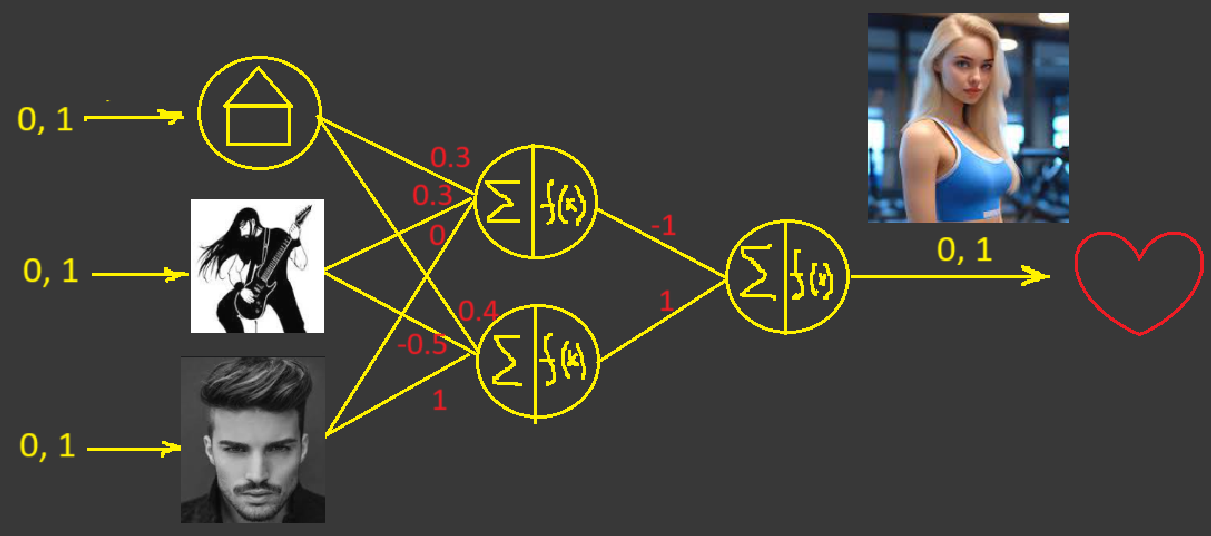

Некоторая прекрасная леди выбирает себе парня. Ее мозг умеет делать некоторые умозаключения, которые можно формализовать такой нейросетевой структурой.

На вход подается три признака

* Есть ли у парня недвижимость (1 - есть, 0 - нет)
* Любит ли парень рок музыку (1 - да, 0 - нет)
* Внешность (1 - красавчик, 0 - так себе)

На выходе формируется значение 0 или 1. (1 - парень понравился, 0 - парень идет нафиг)

Каждый "кружочек" - это нейрон. Внутри каждого рассчитывается
* Взвешенная сумма входящих сигналов

$$output = \displaystyle\sum_{i=1}^{l} \omega_ix_i$$

* Взвешенная сумма затем подается в пороговую (активационную) функцию, результат которой является выходным знаением нейрона:

$$res =
  \begin{cases}
    1,      & \quad \text{if } output \geq 0.5\\
    0  & \quad \text{if } output < 0.5
  \end{cases}
$$
  


Таким образом алгоритм получает на вход массив из трех значений 1 или 0 и на выходе имеет результат 0 или 1.

Напишем этот алгоритм.

In [ ]:
w_1 = np.array([[.3, .3, 0],
                [.4, -.5, 1]])
w_2 = np.array([-1, 1])

# Task_20

Напишем классический Автоэнкодер для картинок MNIST.

In [ ]:
import numpy as np
import torch
import seaborn as sns
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm_notebook


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Загрузка датасета MNIST
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Создание DataLoader для батчевого обучения
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Функция для отображения изображений
def imshow(img):
    img = img / 2 + 0.5  # денормализация
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()



In [ ]:
test_dataset[0][0].shape

torch.Size([1, 28, 28])

--- example label: 7 ---
--- example image-matrix shape: torch.Size([1, 28, 28]) ---


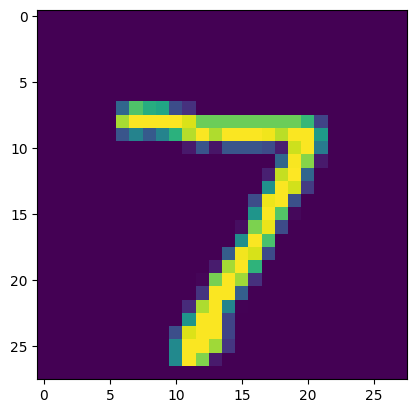

In [ ]:
print(f'--- example label: {test_dataset[0][1]} ---')
print(f'--- example image-matrix shape: {test_dataset[0][0].shape} ---')
imshow(test_dataset[0][0])

## Train

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
            nn.Linear(4, 2),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Tanh()
        )

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Инициализация модели и выбор оптимизатора
autoencoder = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Обучение автоэнкодера
num_epochs = 10

for epoch in tqdm_notebook(range(num_epochs)):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        optimizer.zero_grad()
        outputs = autoencoder(img)
        loss = criterion(outputs, img)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Сохранение модели
torch.save(autoencoder.state_dict(), 'autoencoder.pth')

<ipython-input-10-3d9df188fbf3>:52: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(num_epochs)):


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Loss: 0.2358713001012802
Epoch [2/10], Loss: 0.21531932055950165
Epoch [3/10], Loss: 0.21791182458400726
Epoch [4/10], Loss: 0.19147655367851257
Epoch [5/10], Loss: 0.18655966222286224
Epoch [6/10], Loss: 0.18698547780513763
Epoch [7/10], Loss: 0.18609632551670074
Epoch [8/10], Loss: 0.18147003650665283
Epoch [9/10], Loss: 0.19012586772441864
Epoch [10/10], Loss: 0.16173045337200165


In [ ]:
model_state = autoencoder.state_dict()

In [ ]:
autoencoder.eval()
autoencoder.forward(test_dataset[1][0]).detach().numpy().reshape((28, 28))

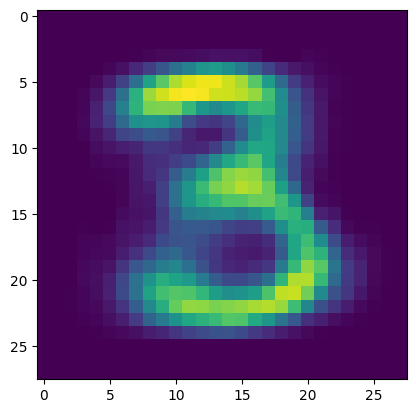

In [ ]:
plt.imshow(autoencoder.forward(test_dataset[1][0]).detach().numpy().reshape((28, 28)))

## Checkpoint

In [ ]:
model_state['encoder.0.weight'].shape

torch.Size([128, 784])

In [ ]:
autoencoder

In [ ]:
print(autoencoder)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=8, bias=True)
    (9): ReLU()
    (10): Linear(in_features=8, out_features=4, bias=True)
    (11): ReLU()
    (12): Linear(in_features=4, out_features=2, bias=True)
    (13): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=64, bias=True)
    (9): ReLU()
    (10): Linear(in_feat

## Encoder

In [ ]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
            nn.Linear(4, 2),
            nn.ReLU()
        )

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.encoder(x)
        return x

encoder = Encoder()
encoder_dict = encoder.state_dict()
encoder_dict.update({k: v for k, v in model_state.items() if k in encoder_dict})

encoder.load_state_dict(encoder_dict)

<All keys matched successfully>

In [ ]:
all_outputs = []

for batch in test_loader:
    img, _ = batch
    encoded_data = encoder(img)
    all_outputs.append(encoded_data)


all_outputs_tensor = torch.cat(all_outputs, dim=0)

Получили все вектора скрытого состояния для тестового набора.

In [ ]:
all_outputs_tensor.shape

torch.Size([10000, 2])

<Axes: xlabel='None', ylabel='None'>

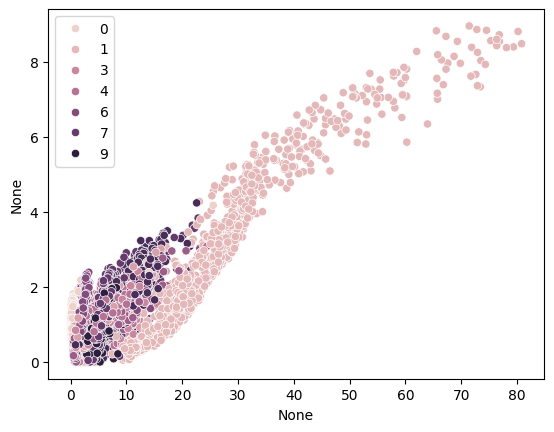

In [ ]:
sns.scatterplot(x=all_outputs_tensor[:, 0].detach(), y=all_outputs_tensor[:, 1].detach(), hue=[i[1] for i in test_dataset])

Напишите декодер сами взяв матрицы весов из чекпоинта `model_state`.

In [ ]:
relu = nn.ReLU() # Функции активации
tanh = nn.Tanh()

print(relu(torch.tensor([-100, -4, -1, - 0.5, 0, .3, 3, 5, 100])))
print(tanh(torch.tensor([-100, -4, -1, - 0.5, 0, .3, 3, 5, 100])))

tensor([  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.3000,   3.0000,
          5.0000, 100.0000])
tensor([-1.0000, -0.9993, -0.7616, -0.4621,  0.0000,  0.2913,  0.9951,  0.9999,
         1.0000])


In [ ]:
all_outputs_tensor = all_outputs_tensor.detach().numpy()

In [ ]:
def relu(input:np.ndarray)->np.ndarray:
    fun = nn.ReLU()
    return fun(torch.tensor(input)).numpy()

def tanh(input:np.ndarray)->np.ndarray:
    fun = nn.Tanh()
    return fun(torch.tensor(input)).numpy()

def linear_0(input:np.ndarray)->np.ndarray:
    return np.dot(input, model_state['decoder.0.weight'].T) + model_state['decoder.0.bias'].numpy()

def linear_2(input:np.ndarray)->np.ndarray:
    return np.dot(input, model_state['decoder.2.weight'].T) + model_state['decoder.2.bias'].numpy()

def linear_4(input:np.ndarray)->np.ndarray:
    return np.dot(input, model_state['decoder.4.weight'].T) + model_state['decoder.4.bias'].numpy()

def linear_6(input:np.ndarray)->np.ndarray:
    return np.dot(input, model_state['decoder.6.weight'].T) + model_state['decoder.6.bias'].numpy()

def linear_8(input:np.ndarray)->np.ndarray:
    return np.dot(input, model_state['decoder.8.weight'].T) + model_state['decoder.8.bias'].numpy()

def linear_10(input:np.ndarray)->np.ndarray:
    return np.dot(input, model_state['decoder.10.weight'].T) + model_state['decoder.10.bias'].numpy()

def linear_12(input:np.ndarray)->np.ndarray:
    return np.dot(input, model_state['decoder.12.weight'].T) + model_state['decoder.12.bias'].numpy()

In [ ]:
y = relu(linear_4(relu(linear_2(relu(linear_0(all_outputs_tensor[0:3]))))))
y = tanh(linear_12(relu(linear_10(relu(linear_8(relu(linear_6(y))))))))

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # денормализация
    plt.imshow(img)
    plt.show()

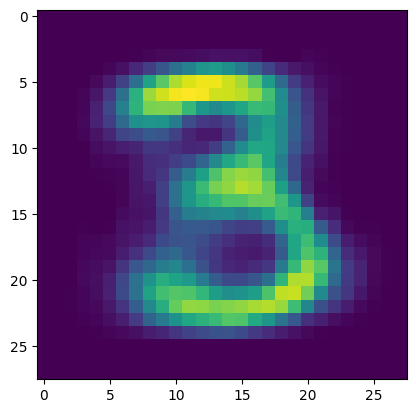

In [ ]:
imshow(y[1].reshape((28, 28)))